In [18]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
movie_data = pd.read_csv(r'data/movie_metadata.csv')
#movie_data = movie_data.replace('', np.nan)

## Data Wrangling

### Firstly, we check what columns are actually useful

In [20]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**Color**

We check that the color column is binary: a film or is 'black and white' or is 'color'. Then, we drop the color column, because we want to help a modern film company and it is gonna make color films quite surely. 

In fact, in the next cells we are gonna keep only movies produced after the 1980. Most of them are 'Color'.

In [77]:
colors = movie_data.color.unique() # values in the column color
color_values = [x for x in colors if str(x) != 'nan']# drop nan
#color_values[1] = color_values[1].strip() # delete spaces before 'black'
print(f"The color column has only {len(color_values)} different values: '{color_values[0]}' and '{color_values[1]}'.")

The color column has only 2 different values: 'Color' and ' Black and White'.


In [174]:
# datarame yyears and colors:
year_color = movie_data[['color', 'title_year']] # we only need color and year
year_color = year_color[~year_color.color.isnull()] # deletete color NaN values 
year_color = year_color[~year_color.title_year.isnull()]  # deletete title NaN values 
year_color = year_color.sort_values('title_year') # sort by year

# histogram which show relation between year and color:
bins = year_color.title_year.drop_duplicates().tolist() # years
n_bins = len(bins)

for i in range(n_bins):  
    year = int(bins[i]) # year
    year_movies = year_color.loc[year_color['title_year'] == bins[i]].color.values # all colors of film of that year
    
    # number black and white and color movies for each year
    num_c = (year_movies == color_values[0]).sum()
    num_bw = (year_movies == color_values[1]).sum()
    
    # dataframe: for each row year, num colors, num blackwhite
    d = {'year':year , 'num_color':num_c , 'num_black_white':num_bw }
    
    if i==0 :
        year_number_colors = pd.DataFrame( data = d , index = [year] )
    else: 
        #year_number_colors = pd.concat(d, ignore_index=True)
        d2 = pd.DataFrame( data = d , index = [year])
        year_number_colors = year_number_colors.append(d2, ignore_index=True)
        
print("For each year, we check how many films are colored and how many black and white:")
year_number_colors = year_number_colors.set_index('year')
year_number_colors.head(20)

For each year, we check how many films are colored and how many black and white:


,num_color,num_black_white
year,,
1916,0,1
1920,0,1
1925,0,1
1927,0,1
1929,0,2
1930,0,1
1932,0,1
1933,0,2
1934,0,1


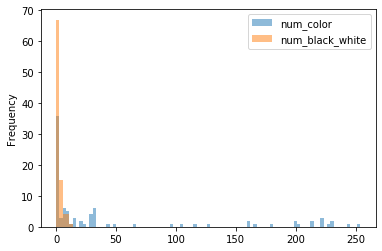

In [176]:
barWidth = 0.25

ax = year_number_colors.plot.hist( by=['num_color','num_black_white'], bins=len(bins), alpha=0.5)


In [168]:
xx

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 7,
 5,
 7,
 6,
 3,
 9,
 9,
 12,
 11,
 7,
 9,
 8,
 6,
 10,
 14,
 15,
 15,
 21,
 31,
 29,
 22,
 31,
 29,
 24,
 32,
 31,
 32,
 29,
 28,
 33,
 44,
 50,
 66,
 97,
 115,
 128,
 161,
 166,
 179,
 199,
 160,
 202,
 213,
 228,
 200,
 223,
 254,
 229,
 221,
 214,
 231,
 245,
 223,
 105]

In [134]:
year_number_colors.append(d2, ignore_index=True)
year_number_colors

,year,num_c,num_bw
0,1916,0,1
1,1920,0,1
2,1925,0,1
3,1927,0,1
4,1929,0,2
...,...,...,...
86,2012,214,5
87,2013,231,5
88,2014,245,3
89,2015,223,1


In [40]:
year_color

,color,title_year
4810,Black and White,1916.0
4958,Black and White,1920.0
4885,Black and White,1925.0
2734,Black and White,1927.0
4812,Black and White,1929.0
...,...,...
57,Color,2016.0
970,Color,2016.0
2562,Color,2016.0
4453,Color,2016.0


In [15]:
movie_data = movie_data.drop('color', axis=1) # drop color column

**Year**
Custumers' tastes change really fastly. We have already decided to drop black and white films, because they are not relevant for the analysis. In the same way, we can ignore films which were produced before 1980. As it can be seen in this histogram, this choice does not drop the majority of the movies

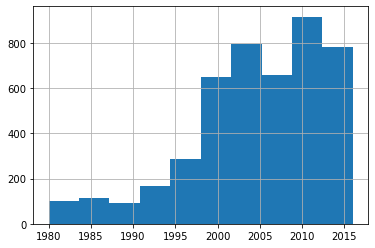

In [17]:
movie_data.title_year.hist();

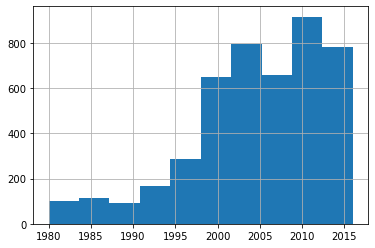

In [18]:
movie_data = movie_data[movie_data.title_year>=1980]
movie_data.title_year.hist();

In [7]:
movie_data.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
d

nothing wrong in the types of the varibles


How many data are missed for each column

In [8]:
movie_data.isna().sum()

director_name                  0
num_critic_for_reviews        41
duration                      12
director_facebook_likes        0
actor_3_facebook_likes        16
actor_2_name                  10
actor_1_facebook_likes         7
gross                        619
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  16
facenumber_in_poster          13
plot_keywords                140
movie_imdb_link                0
num_user_for_reviews          15
language                       5
country                        1
content_rating               255
budget                       375
title_year                     0
actor_2_facebook_likes        10
imdb_score                     0
aspect_ratio                 304
movie_facebook_likes           0
dtype: int64

From the movie_imdb_link we extract the IMDB link. It is useful to match this database with the other one, that we need to fill the NaN values. the reason why we do not use the title to match them is that the title is not an unique key: it can be inconsistent between different data sets (eg Capitalization). 
We chack that this 'imdb_id' is unique and we set it as index 

In [9]:
movie_data['imdb_id'] = movie_data.movie_imdb_link.str.split('/').map(lambda row: row[4])
if movie_data.imdb_id.nunique()==len(movie_data.imdb_id): 
    movie_data = movie_data.set_index(imdb_id)
    
movie_data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_id
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,tt0499549
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,tt0449088
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,tt2379713
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,tt1345836
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,tt0401729


From the DataFrame we delete duplicates movies. In order to do that, we sort our value for the number of NaN and we keep only the copy with the lower number of features with value NaN. 
This should not only delete duplicates, but also reduce the number of NaN for each feature.

In [10]:
movie_data = (
    movie_data.iloc[movie_data.isnull().sum(axis=1).mul(-1).argsort()] # Sort by number of NaN
        .drop_duplicates(subset='imdb_id', keep='last') # Remove duplicates taking last element
)

movie_data.isna().sum()

director_name                  0
num_critic_for_reviews        40
duration                      12
director_facebook_likes        0
actor_3_facebook_likes        16
actor_2_name                  10
actor_1_facebook_likes         7
gross                        604
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  16
facenumber_in_poster          13
plot_keywords                138
movie_imdb_link                0
num_user_for_reviews          15
language                       5
country                        1
content_rating               253
budget                       369
title_year                     0
actor_2_facebook_likes        10
imdb_score                     0
aspect_ratio                 301
movie_facebook_likes           0
imdb_id                        0
dtype: int64

For example, we can notice that now we do not miss any values in the directure feature! This makes our DataFrame more consistent. 
Moreover, now we have an unique key, imdb_id, which can be used as index.

In [19]:
movie_data = movie_data.set_index('imdb_id')
movie_data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt2638024,Amal Al-Agroobi,NaN,62.0,58.0,NaN,NaN,NaN,NaN,Documentary|Family,NaN,...,NaN,Arabic,United Arab Emirates,NaN,125000.0,2013.0,NaN,8.2,NaN,54
tt0488873,Andrew Berends,12.0,90.0,0.0,NaN,NaN,NaN,NaN,Documentary|War,NaN,...,7.0,English,USA,NaN,120000.0,2005.0,NaN,6.6,1.66,14
tt4607906,Valentine,NaN,NaN,0.0,NaN,Valentine,17.0,NaN,Romance,Diane Sorrentino,...,NaN,English,USA,PG-13,125000.0,2015.0,0.0,5.1,NaN,0
tt4462082,Jem Cohen,12.0,111.0,6.0,NaN,NaN,NaN,NaN,Documentary,NaN,...,1.0,English,USA,NaN,50000.0,2015.0,NaN,6.0,1.78,5
tt0304692,Harry Gantz,12.0,105.0,0.0,NaN,NaN,NaN,247740.0,Documentary|Drama,NaN,...,8.0,English,USA,NaN,NaN,2002.0,NaN,4.7,1.33,51


In [22]:
movie_data.aspect_ratio.unique()

array([  nan,  1.66,  1.78,  1.33, 16.  ,  1.85,  2.35,  1.37,  2.39,
        1.89,  1.44,  2.  ,  2.2 ,  2.4 ,  1.75,  2.55,  2.76,  2.24,
        1.77,  1.5 ,  1.18])

```
SELECT ?movieLabel (MAX(?grosses) as ?gross) (MIN(?costs) as ?cost) (MIN(?publicationYears) as ?publicationYear) ?IMDBid
WHERE 
{
  ?movie (wdt:P31/wdt:P279*) wd:Q11424;
                             wdt:P345 ?IMDBid;
                             wdt:P2142 ?grosses;
                             wdt:P577 ?publicationDate.
  
  OPTIONAL {?movie wdt:P2130 ?costs.}
  
  BIND(YEAR(?publicationDate) AS ?publicationYears)
  
  FILTER(?publicationYears >= (1980))
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} GROUP BY ?movieLabel ?IMDBid
```

In [26]:
wiki_data = pd.read_csv('data/wiki_data.csv').drop('movieLabel', axis=1)
movie_data.merge(wiki_data, how='left', left_on='imdb_id', right_on='IMDBid')

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_x,genres,actor_1_name,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_y,cost,publicationYear,IMDBid
0,Amal Al-Agroobi,NaN,62.0,58.0,NaN,NaN,NaN,NaN,Documentary|Family,NaN,...,125000.0,2013.0,NaN,8.2,NaN,54,NaN,NaN,NaN,NaN
1,Andrew Berends,12.0,90.0,0.0,NaN,NaN,NaN,NaN,Documentary|War,NaN,...,120000.0,2005.0,NaN,6.6,1.66,14,NaN,NaN,NaN,NaN
2,Valentine,NaN,NaN,0.0,NaN,Valentine,17.0,NaN,Romance,Diane Sorrentino,...,125000.0,2015.0,0.0,5.1,NaN,0,NaN,NaN,NaN,NaN
3,Jem Cohen,12.0,111.0,6.0,NaN,NaN,NaN,NaN,Documentary,NaN,...,50000.0,2015.0,NaN,6.0,1.78,5,NaN,NaN,NaN,NaN
4,Harry Gantz,12.0,105.0,0.0,NaN,NaN,NaN,247740.0,Documentary|Drama,NaN,...,NaN,2002.0,NaN,4.7,1.33,51,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Anne Fletcher,175.0,111.0,98.0,71.0,Bern Cohen,2000.0,76806312.0,Comedy|Romance,Judy Greer,...,30000000.0,2008.0,805.0,6.1,2.35,0,NaN,NaN,NaN,NaN
4556,Nick Cassavetes,177.0,123.0,415.0,545.0,Kevin Connolly,33000.0,64286.0,Drama|Romance,Ryan Gosling,...,29000000.0,2004.0,638.0,7.9,2.35,57000,15533000.0,30000000.0,2004.0,tt0332280
4557,Harold Ramis,145.0,103.0,11000.0,636.0,Chazz Palminteri,22000.0,106694016.0,Comedy|Crime,Robert De Niro,...,30000000.0,1999.0,979.0,6.7,1.85,0,176880000.0,80000000.0,1999.0,tt0122933
4558,Edward Zwick,57.0,133.0,380.0,918.0,Brad Pitt,12000.0,66528842.0,Drama|Romance|War|Western,Anthony Hopkins,...,30000000.0,1994.0,11000.0,7.5,1.85,11000,NaN,NaN,NaN,NaN


## univariate Analysis

In [10]:
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


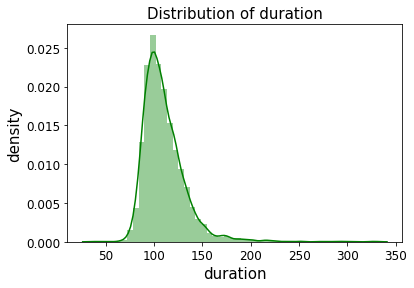

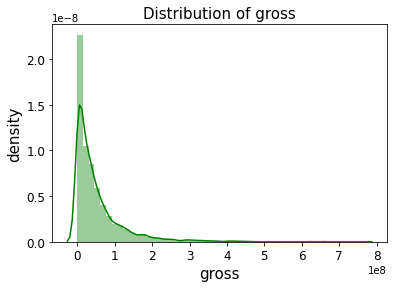

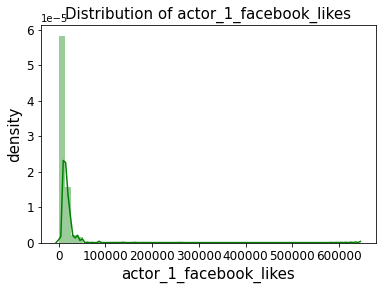

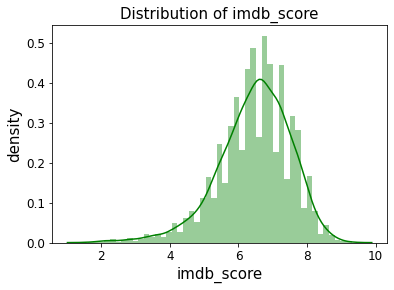

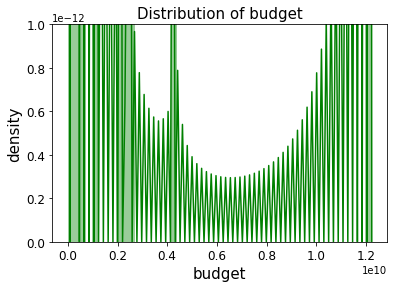

In [11]:
for col in ["duration", "gross", "actor_1_facebook_likes",'imdb_score','budget']:
    plt.figure(figsize=(6,4))
    sns.distplot(movie_data[col],color='g')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("density", fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=15)

we can see that distribution of budget of gross (profits?) are not so explanatory this is due to the fact the the data sets includes both boxoffice movies and documentaries that have a significant different marketing and financial needs.
So interesting to consider only the top 5 genres 


In [41]:
color_values

['Color', ' Black and White']

In [12]:
print ("Percentages of the possible values for each single object")
movie_data = movie_data.select_dtypes(include=['O'])
for c in ['genres','director_name','actor_1_name']:
    print ("top 5 %s" % c)
    print (movie_data[c].value_counts(normalize=True).head())

Percentages of the possible values for each single object
top 5 genres
Drama                   0.046798
Comedy                  0.041444
Comedy|Drama            0.037874
Comedy|Drama|Romance    0.037081
Comedy|Romance          0.031331
Name: genres, dtype: float64
top 5 director_name
Steven Spielberg    0.005264
Woody Allen         0.004454
Martin Scorsese     0.004049
Clint Eastwood      0.004049
Ridley Scott        0.003442
Name: director_name, dtype: float64
top 5 actor_1_name
Robert De Niro    0.009730
Johnny Depp       0.008141
Nicolas Cage      0.006553
J.K. Simmons      0.006156
Matt Damon        0.005957
Name: actor_1_name, dtype: float64


In [14]:
movie_data['budget']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 5043, dtype: float64

In [49]:
movie_data.country.unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'South Korea',
       'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark', 'Libya', 'Ireland',
       'South Africa', 'Switzerland', 'Romania', 'West Germany', 'Chile',
       'Netherlands', 'Hungary', 'Panama', 'Greece', 'Sweden', 'Taiwan',
       'Official site', 'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria',
       'Georgia', 'Iceland', 'Norway', 'Turkey', 'Nigeria', 'Brazil',
       'Finland', 'Bahamas', 'Argentina', nan, 'Colombia', 'Poland',
       'Israel', 'Egypt', 'Kyrgyzstan', 'Indonesia', 'Pakistan', 'Iran',
       'Slovenia', 'Afghanistan', 'Dominican Republic', 'Cameroon',
       'United Arab Emirates', 'Kenya', 'Philippines'], dtype=object)